# IMAGE CLASSIFICATION USING KERAS

## Introduction
This notebook performs image classification using tensorflow models to identify white and dark chocolate.

## Methodology
- Import important libraries
- Accessing and Loading the image data
- Splitting the data into train and validation set
- Modeling
- Evaluation

## Importing Libraries
For this project we will be using common tensorflow libraries. Some of the important libraries used here include:
* **Keras:** This provides a user-friendly interface for building, training, and deploying deep learning models.
* **TensorFlow(tf):** For building and training deep learning models, including neural networks.
* **os:** For reading and writing the image data files in our operating systems.
* **OpenCV(cv2):** For image analysis and image processing.
* **imghdr:** For determining the type of an image file based on its content, helps identify the format of an image file (e.g., JPEG, PNG, GIF)
* **Matplotlib:** For visualizing the images.

In [1]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import imghdr
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


2024-05-31 12:42:04.421188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading the Dataset
Here, we use the os library to access the image directory. 

### Accessing the data directory
We access the files in the directory using `os.listdir()` function.


In [2]:
# accessing the data directory
data_dir = 'IMG DATA'
files  = os.listdir(data_dir)
files

['Dark Chocolate', 'White Chocolate']

#### Observations
We have now deleted the wrong file. we can also access the images in each file using the `os.path.join()` function

In [4]:
# Accessing the images in the Dark chocolate folder
files_in_directory = os.listdir(os.path.join(data_dir, 'Dark Chocolate'))

# Accessing the first five files
first_five = files_in_directory[:5]
first_five

['Image_144.jpg',
 'Image_151.jpg',
 'Image_179.jpg',
 'Image_184.jpg',
 'Image_153.jpg']

From these we can see the top image files contained in the dark chocolate folder, we can also do similar to view those in the white chocolate folder.

### Cleaning the images
For our analysis, we only want image formats with jpg', 'jpeg', 'png', 'bmp', this is important for easy processing. So we create a loop that goes through each file folder, and another loop that goes through each images and identify and remove image format that are not in our specified path list. The `imghdr.what()` function helps us isolate each path formats for easy identification.

In [5]:
# Verifying the image types
img_types = ['jpg', 'jpeg', 'png', 'bmp']

# looping through the images in the data folder to verify their type
for file in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, file)):
        image_path = os.path.join(data_dir, file,image)
        tip = imghdr.what(image_path)
        if tip not in img_types:
            print(f'Wrong image type: {image_path}')
            os.remove(image_path)        

#### Observations
As is shown above, these are images with different format and have been removed from the directore

## Preprocessing
### Spilitting the Data into validation and training set
Here we use the default splif from the `tf.keras.utils.image_dataset_from_directory()` function. \
NB: The default batch size here is 32, and the default image size is (256,256)

In [ ]:
# Identifying the default parameters
tf.keras.utils.image_dataset_from_directory??

In [6]:
# Loading the data
data = tf.keras.utils.image_dataset_from_directory('IMG DATA')
data

Found 134 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Data Iteration and NumPy Processing
Here we extract each image in the dataset as a NumPy array and also create and iterator that allows is iterate over each batches created from the dataset.

In [7]:
# Creating a numpy iterator
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Identifying the length of the batch
len(batch)

2024-01-12 17:06:55.866063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


2

#### Observations

Here, we see that the batch list is made up of two columns, one representing the image (`batch[0]`) and the other representing the image titles(labels) (`batch[1]`). 

In [8]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

#### Observations

This shows the batch size as 32, and the image height and width as 256, and the image colour type 3(i.e.'rgb')

In [9]:
# Image labels in each batch
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

#### Observations
Here,we see that the batches have labels of 1 and 0, however, it is impossible to tell which stands for dark chocolate and which stands for white chocolates. To get a clear visual, we use the matplotlib to identify each label type. 

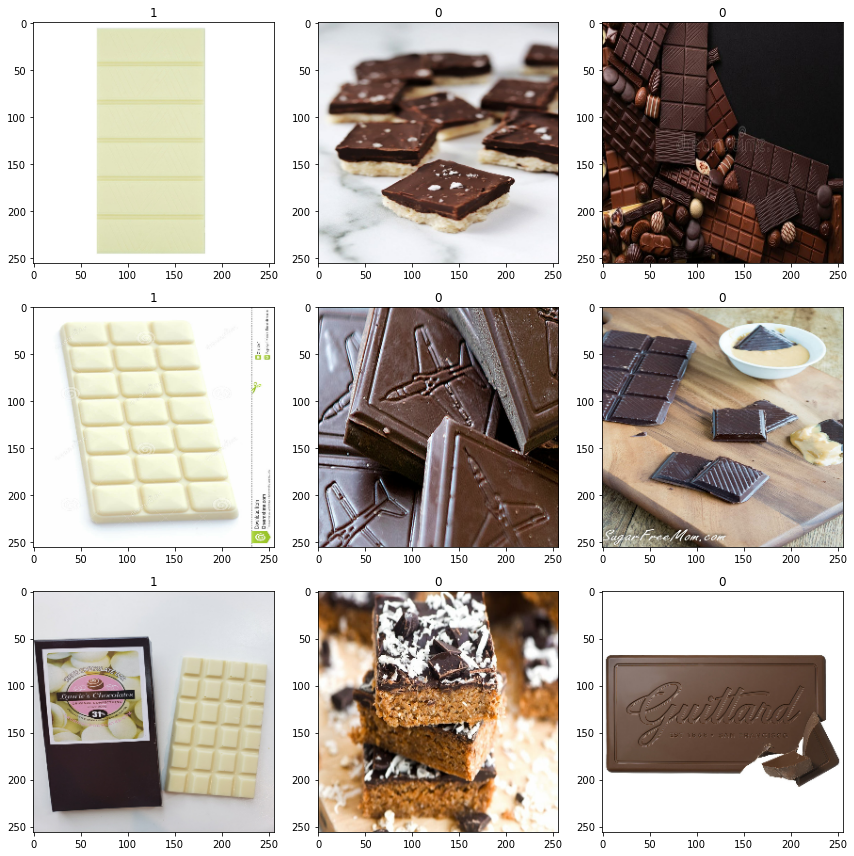

In [10]:
# Vizualizing the data
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for idx, (img, title) in enumerate(zip(batch[0][:9], batch[1][:9])):
    # Display images
    ax[idx // 3, idx % 3].imshow(img.astype(int))
    
    # Set titles
    ax[idx // 3, idx % 3].set_title(title)

# Adjust layout 
plt.tight_layout()
plt.show()


Evidently, we can now say that the dark chocolate is represnted as 0 and the white chocolate is represented by 1.

### Scaling the data
Here, we  normalizing the pixel values of each images by dividing them by 255. This helps us arrive at a range between 0 and 1, and in turn helps training the neural network faster. Using the `lamda` we a able to iterate throgh all images and scale the pixel size. 


In [11]:
# scaling the data
data = data.map(lambda x,y: (x/255, y))

# getting the minimum and maximum pixel size
min_img = data.as_numpy_iterator().next()[0].min()
max_img = data.as_numpy_iterator().next()[0].max()

# Displaying the size
print(f'The minimum pixel size is: {min_img}')
print(f'The maximum pixel size is: {max_img}')


2024-01-12 17:07:15.138095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-01-12 17:07:16.624959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


The minimum pixel size is: 0.0
The maximum pixel size is: 1.0


#### Observations
We have now successfuly scaled the pixel sizes using the `.map()` function. It is important to note that the X in the `.map()` represents the first column in our batch whih includes all the images, and the Y represents the the label column, this is why we have divided X by 255 and not Y


### Splitting the data
Here we split the data into three parts, train, test and validation parts. The train part will take 60% of the batches while the test and validation size will take 20% of the batch each. The train and validation data will be used to build the model, and the test data will be used to evaluate the models performance in terms of other metrics.

First we identify the number of batches, then we multiply the length by 60%(0.6) for the train size and 20%(0.2) for the text and validation set. Finally we use the `.take()`function to assign each batch to the different sets and we use the `.skip()`to skip batches already assigned to other sets.;

In [12]:
# Identifying the length of the data batch
len(data)

5

In [13]:
# Spliting the data into train and val_size
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [14]:
# Assigning each batch to the different sets
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Displaying the size
print(f'The train size is: {len(train)}')
print(f'The validation size is: {len(val)}')
print(f'The test size is: {len(test)}')

The train size is: 3
The validation size is: 1
The test size is: 1


#### Observations
Here, we see that the data was splitted in 5 batches(32 images per batch). We have now successfuly splitted the batch into 3 parts, with 3 batch going to the train set(5*0.6) and both the validation and test set taking 1 batch each.

## Modeling (CNN MODEL)
For this, we use the keras sequential model for our image data. The Sequential model is being used to create a linear stack of layers. These layers are commonly used in convolutional neural networks (CNNs), and the specific layers we will be using in our assessment include the:
* Conv2D: A 2D convolution layer for feature extraction in image data.
* MaxPooling2D: To reduce the spatial dimensions of the input, reducing computational complexity and focusing on the most important features.
* Dense: This help to connect every node of each layers. Thus, every node in the layer is connected to every node in the previous and the next layers, forming a densely connected layer.
* Flatten: Used to flatten the input, transforming it into a one-dimensional array. It is often used as a bridge between convolutional layers and fully connected layers in a neural network.


In [15]:
# Importing important libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

### Building the Model
For the model, we create three Conv2D layers, the first and third layers with 16 filters of size (3,3) and the second layer with 32 filters of size (3,3). After each convolutional layer, we add a MaxPooling2D layer with default parameters to downsample the spatial dimensions of the feature maps. We also add a flatten layer and two dense layers, one with 256 units with ReLU activation, and the other with 1 unit and a sigmoid activation, which is common for binary classification tasks.

In [71]:
# initiating the sequential function
model = Sequential()

# Adding the layers 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the Model
Now that the model has been built, we compile the model using the Adam optimizer and the BinaryCrossentropy() loss function, which is commonly used for binary classifications, we set our metrics as accuracy as we compile the model.

In [72]:
#Compiling the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [73]:
# Getting the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 16)       

#### Observations
From the model compilation, we now see that the model has 3,696,625 parameters. 

### Fitting the model
Next we fit the model with our train and validation dataset, and run it for 10 times(epochs=10)

In [74]:
#Fitting the model
history = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10


2024-01-12 17:47:07.093557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 1.8719 - accuracy: 0.4583

2024-01-12 17:47:11.196846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 7s 1s/step - loss: 1.8719 - accuracy: 0.4583 - val_loss: 1.1745 - val_accuracy: 0.4375
Epoch 2/10


2024-01-12 17:47:12.731787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.7372 - accuracy: 0.6250

2024-01-12 17:47:15.977578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 1s/step - loss: 0.7372 - accuracy: 0.6250 - val_loss: 0.5744 - val_accuracy: 0.5938
Epoch 3/10


2024-01-12 17:47:17.521909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.6042

2024-01-12 17:47:21.021413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 2s/step - loss: 0.6004 - accuracy: 0.6042 - val_loss: 0.5027 - val_accuracy: 0.9062
Epoch 4/10


2024-01-12 17:47:22.627555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.4668 - accuracy: 0.8958

2024-01-12 17:47:25.972830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 1s/step - loss: 0.4668 - accuracy: 0.8958 - val_loss: 0.3993 - val_accuracy: 0.9062
Epoch 5/10


2024-01-12 17:47:27.569308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8854

2024-01-12 17:47:31.593884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 6s 2s/step - loss: 0.3870 - accuracy: 0.8854 - val_loss: 0.3536 - val_accuracy: 0.8750
Epoch 6/10


2024-01-12 17:47:33.357274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.8021

2024-01-12 17:47:36.909270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 2s/step - loss: 0.4195 - accuracy: 0.8021 - val_loss: 0.2758 - val_accuracy: 0.9062
Epoch 7/10


2024-01-12 17:47:38.689014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.3478 - accuracy: 0.8438

2024-01-12 17:47:42.347768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 2s/step - loss: 0.3478 - accuracy: 0.8438 - val_loss: 0.3421 - val_accuracy: 0.8125
Epoch 8/10


2024-01-12 17:47:44.004505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.2390 - accuracy: 0.9167

2024-01-12 17:47:47.670979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 5s 2s/step - loss: 0.2390 - accuracy: 0.9167 - val_loss: 0.1563 - val_accuracy: 0.9375
Epoch 9/10


2024-01-12 17:47:49.592540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.2226 - accuracy: 0.9271

2024-01-12 17:47:53.353035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 6s 2s/step - loss: 0.2226 - accuracy: 0.9271 - val_loss: 0.1902 - val_accuracy: 0.9062
Epoch 10/10


2024-01-12 17:47:55.040951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9062

2024-01-12 17:47:58.919630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 6s 2s/step - loss: 0.1872 - accuracy: 0.9062 - val_loss: 0.2178 - val_accuracy: 0.9062


#### Observations
We have now successfuly trained our model, and it performs very well! with loss at 0.13%, and accuracy at 0.95%. 

### Evaluation
Finally, we observe how the model performed at each epochs in terms of accuracy and losses using a line chart. Using matplotlib, we plot the training and validation accuracy, ase well as their losses

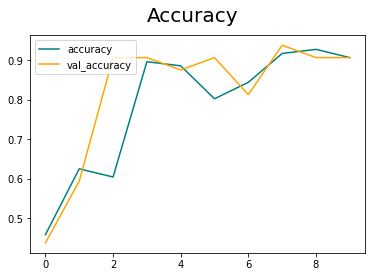

In [75]:
# Plotting training and validation accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

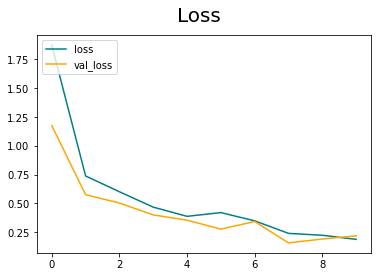

In [76]:
# Plotting training and validation loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### Observations
From both charts, we can see very little distance from both the loss and accuracy score, through each run. 

For a more precise evaluation, we explore other metrics such as the recall, precision, and binaryaccuracy score to explore how the model performs using the test dataset. First we import the metrics from tensorflow, next we itterate through the test dataset, and we identify the images(X) and the labels(y). Then we predict the images using the model, and finally we evaluate how well the model has been able to predict the labels using each metrics.

In [77]:
# Importing evaluation metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [78]:
# Evaluate model on the test dataset
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Print evaluation metrics
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')


2024-01-12 17:48:55.642858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 99ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


#### Observation
We see now that the model has a perfect score across all metrics, telling us that the model perfectly predicts each images in the test dataset. 

**Test1**\
For better estimation, we import a new chocolate image outside the original dataset to evaluate the models ability to predict the labels of the image.

In [182]:
# Identifying the path of the new image
path = os.path.join('DATA', 'chocotest3.jpeg')
path

'DATA/chocotest3.jpeg'

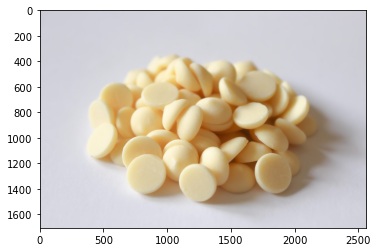

In [183]:
# Visualizing the image
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

For compatability with our model, we resize the image to height 256 and width 256

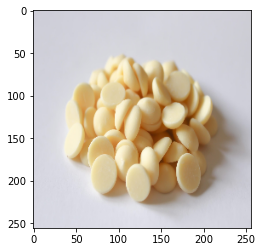

In [184]:
# Resizing the images 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [185]:
# Predicting the image type
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 38ms/step


array([[0.70744133]], dtype=float32)

In [186]:
if yhat > 0.5: 
    print(f'Predicted class is White Chocolate')
else:
    print(f'Predicted class is Dark Chocolate')

Predicted class is White Chocolate


#### Observations
As we can evidently see, the model has succesfully made accurate predictions for the new image. 

**Test2**\
We try one more time for the dark choclate, following similar steps as we did with the previous test.

In [65]:
def read_img(image_path):
    img_dark = cv2.imread(image_path)
    reshape = tf.image.resize(img_dark, (256,256))
    reshape.numpy().astype(int)
    yhat = my_model.predict(np.expand_dims(reshape/255, 0))
    if yhat > 0.5:
        print(f'Predicted class is White Chocolate')
    else:
        print(f'Predicted class is Dark Chocolate')

In [66]:
img = 'DATA/Dark Test.jpeg'
j = read_img(img)
j

1/1 [==============================] - 0s 384ms/step
Predicted class is Dark Chocolate


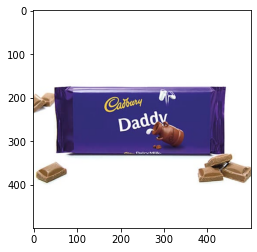

In [84]:
# Reading and visualizing the image
img_dark = cv2.imread('DATA/Dark Test.jpeg')
plt.imshow(cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB))

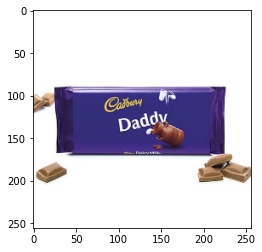

In [85]:
# Resizing the image
img_dark = cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB)
reshape = tf.image.resize(img_dark, (256,256))
plt.imshow(reshape.numpy().astype(int))
plt.show()

In [86]:
yhat = model.predict(np.expand_dims(reshape/255, 0))
yhat

1/1 [==============================] - 0s 30ms/step


array([[0.03000764]], dtype=float32)

In [87]:
if yhat > 0.5: 
    print(f'Predicted class is White Chocolate')
else:
    print(f'Predicted class is Dark Chocolate')

Predicted class is Dark Chocolate


#### Observations
Yet again, we see that the model has successfully predicted the type of chocolate we have provided.

With all satisfied, we proceed to save our model using the `model.save()`function.

In [88]:
filename = 'model.h5'
model.save(filename)

## PART 2: Transfer Learning
Here, we train our data with an already pretrained model in tensorflow. For this analysis, we decided to use the VGG19 model.

VGG19 is a convolutional neural network architecture that belongs to the VGG (Visual Geometry Group) family of models. It was introduced by the Visual Geometry Group at the University of Oxford. The model has 19 layers(which explains the 19) 16 convolutional layers with size (3,3) and ReLu activation, and 3 Dense layers with 4096, 4096, and 1000 nodes, respectively.

We have essentially choosen this model due to its very similarity with our previously trained model. Here are the steps taken in this section

- Import VGG19 model from tensorflow
- Train our data on the last three layers, and freeze the rest of the layers
- Build the model
- Compile the model
- Evaluate the model \


### Importing VGG19 model from tensorflow
Here we import the VGG19 model, and read the model using the same image size as our train data, and removing the top. Also weights is set to 'imagenet'


In [41]:
#Importing VGG19 from tensorflow
from tensorflow.keras.applications import VGG19

In [42]:
#loading the vgg19 model
model = VGG19(weights='imagenet', input_shape= (256, 256,3),include_top = False) 
model.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

### Freezing most part of the VGG19 layers:
Here we loop throught the layers in the models and make them nontrainable, essentialy freezing the layers and making their weight unupdated during the modeling process. This is important as we are only concerened with just a small dataset, and do not have the computational power to run a large model like VGG19. So we freeze the layers except for the last three layers, and build our model with that.
 

In [43]:
# Iterate over layers and set them as non-trainable
for layer in model.layers[:-3]:
    layer.trainable = False

### Building the Model
Here using the pretrained parameter of the VGG19 layers, we include 2 additional convolutional layers, a maxpooling layer after each convolytional layer, as well as a flatten layer and a two dense layers.

In [44]:
my_model = Sequential([
    model,
    Conv2D(32, 1, 1, activation='relu'),  
    MaxPooling2D(),
    Conv2D(16, 1, 1, activation='relu'), 
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])



### Compiling the Model
As before, we will compile the model, using the Adam optimizer, the BinaryCrossentropy() loss function and the accuracy metrics.

In [45]:
#Compiling the model
my_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 16)          528       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)               

#### Observations
Here we can see that the model has 20,058,225 total parameters and a total of 33,841 trainable parameter. Now we fit the model with our train and validation data. 

### Fitting the Model
As before, we will fit the model using the train and validation dataset, and run the model 10 times, thus epochs = 10.

In [46]:
#Fitting the model
Trans_model = my_model.fit(train, epochs=10, validation_data=val)

Epoch 1/10


2024-01-12 17:12:13.524903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.4792 

2024-01-12 17:12:54.558061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 57s 21s/step - loss: 0.7199 - accuracy: 0.4792 - val_loss: 0.6381 - val_accuracy: 0.7812
Epoch 2/10


2024-01-12 17:13:08.929301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.6237 - accuracy: 0.6875 

2024-01-12 17:13:57.052813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 64s 24s/step - loss: 0.6237 - accuracy: 0.6875 - val_loss: 0.3880 - val_accuracy: 0.8750
Epoch 3/10


2024-01-12 17:14:12.878730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.7188 

2024-01-12 17:15:02.938275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 66s 24s/step - loss: 0.5791 - accuracy: 0.7188 - val_loss: 0.6564 - val_accuracy: 0.6250
Epoch 4/10


2024-01-12 17:15:18.387007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.5797 - accuracy: 0.7083 

2024-01-12 17:16:07.732106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 65s 24s/step - loss: 0.5797 - accuracy: 0.7083 - val_loss: 0.2127 - val_accuracy: 0.9688
Epoch 5/10


2024-01-12 17:16:23.583246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.8646 

2024-01-12 17:17:12.433678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 64s 24s/step - loss: 0.3294 - accuracy: 0.8646 - val_loss: 0.2585 - val_accuracy: 0.9062
Epoch 6/10


2024-01-12 17:17:27.952408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9271 

2024-01-12 17:18:16.638718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 64s 23s/step - loss: 0.2042 - accuracy: 0.9271 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 7/10


2024-01-12 17:18:32.214402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9688 

2024-01-12 17:19:19.350807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 63s 23s/step - loss: 0.0930 - accuracy: 0.9688 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 8/10


2024-01-12 17:19:34.978484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000 

2024-01-12 17:20:21.258273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 61s 22s/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 9/10


2024-01-12 17:20:36.356115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000 

2024-01-12 17:21:21.394297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 60s 22s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 10/10


2024-01-12 17:21:36.467829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000 

2024-01-12 17:22:21.520291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


3/3 [==============================] - 60s 22s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 8.2238e-04 - val_accuracy: 1.0000


### Evaluation
We have now successfuly trained our model, and it performs exceptionaly well! with loss at 0.04%, and accuracy at 1.00%. As before, let's observe how the model performed at each epochs in terms of accuracy and losses of the train and validation set.

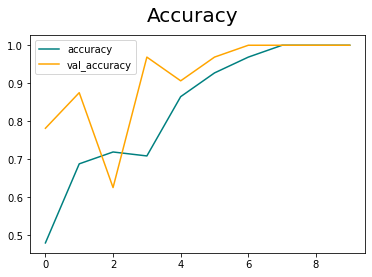

In [47]:
# Plotting training and validation accuracy
fig = plt.figure()
plt.plot(Trans_model.history['accuracy'], color='teal', label='accuracy')
plt.plot(Trans_model.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

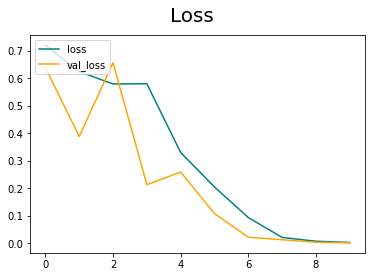

In [48]:
# Plotting training and validation loss
fig = plt.figure()
plt.plot(Trans_model.history['loss'], color='teal', label='loss')
plt.plot(Trans_model.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### Observations
Both graphs shows an incredible performance of the model over each iteration. 

As we did previously, we examine the models performance by exploring other metrics.

In [49]:
# Evaluate model on the test dataset
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = my_model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Print evaluation metrics
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')



2024-01-12 17:25:02.005165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 2s 2s/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


#### Observation
Once again, we can see that this model is performing exceptionally well, with a perfect score across all three metrics scores. 

Finally we save the model.

In [50]:
filename = 'my_model.h5'
my_model.save(filename)

### References
1. Abramson, R. (2023, August 16). TensorFlow Tutorials: Images - Classification. TensorFlow. Retrieved from https://www.tensorflow.org/tutorials/images/classification
2. Abramson, R. (2023, August 16). TensorFlow Tutorials: Images - Transfer Learning. TensorFlow. Retrieved from https://www.tensorflow.org/tutorials/images/transfer_learning
3. Sharma, A. (2020, February 2). Learn Image Classification using CNNs: Convolutional Neural Networks and 3 Datasets. Analytics Vidhya. Retrieved from [https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/](https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/)


In [190]:
# A function to make predictions

def read_img2(image_path, model):
    img_dark = cv2.imread(image_path)
    img = cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256,256))
    plt.imshow(resize.numpy().astype(int))
    plt.show()
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    if yhat > 0.5:
        print(f'{yhat},Predicted class is White Chocolate')
    else:
        print(f'{yhat},Predicted class is Dark Chocolate')

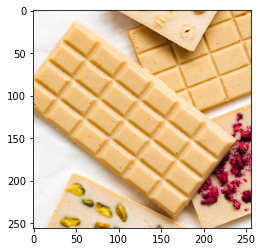

1/1 [==============================] - 0s 415ms/step
[[0.9765735]],Predicted class is White Chocolate


In [203]:
img1 ='DATA/chocotest6.jpeg'
j = read_img2(img1, my_model)
j